## Neural Art Demo
This demo is an implementation of the algorithm in the paper [A Neural Algorithm of Artistic Style](http://arxiv.org/abs/1508.06576) by Leon A. Gatys, Alexander S. Ecker, and Matthias Bethge.

This algorithm transfers 'artistic style' from one image to the other. For example, you can make your favourite photo looks like van Gogh's painting.

First, we import the necessary modules and download the pre-trained model.

In [1]:
# some setup
%matplotlib inline
import matplotlib.pyplot as plt
import os
import urllib
import numpy as np
from skimage import io

if not os.path.exists("model/vgg19.params"):
    urllib.urlretrieve("https://github.com/dmlc/web-data/raw/master/mxnet/neural-style/model/vgg19.params", "model/vgg19.params")

This code block downloads the "style" and "content" images. Change the URLs to use your own images.

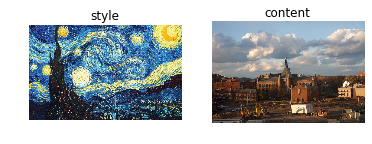

In [2]:
# URL to the style image. Change this to use your own style.
style_url = """https://github.com/dmlc/web-data/raw/master/mxnet/neural-style/input/starry_night.jpg"""
# URL to the content image. Change this to use your own content
content_url = """https://github.com/dmlc/web-data/raw/master/mxnet/neural-style/input/IMG_4343.jpg"""

# Download the images
style_path = "input/style.jpg"
content_path = "input/content.jpg"
urllib.urlretrieve(style_url, style_path)
urllib.urlretrieve(content_url, content_path)

style_img = io.imread(style_path)
content_img = io.imread(content_path)

# Show the images
plt.subplot(121)
plt.axis('off')
plt.title('style')
plt.imshow(style_img)
plt.subplot(122)
plt.axis('off')
plt.title('content')
plt.imshow(content_img)
plt.show()

Now we need to set some parameters. You can tweek these to get a better result.

In [3]:
# Stopping criterion. A larger value means less time but lower quality.
stop_eps = 0.005

# Resize the long edge of the input images to this size.
# Smaller value is faster but the result will have lower resolution.
max_size = 600

# content image weight. A larger value means more original content.
content_weight = 10.0

# Style iamge weight. A larger value means more style.
style_weight = 1.0

# Learning rate. Change this affacts the result.
lr = 0.1

# Remove noise. The amount of noise to remove.
remove_noise = 0.2

Preperation is done. Let's start!

In [4]:
import subprocess
import sys
cmd = "python run.py --style-image=%s --content-image=%s --stop-eps=%f --max-long-edge=%d --content-weight=%f --style-weight=%f --lr=%f --remove-noise=%f"%\
      (style_path, content_path, stop_eps, max_size, content_weight, style_weight, lr, remove_noise)
p = subprocess.Popen(cmd, shell=True, stderr=subprocess.PIPE)

while True:
    out = p.stderr.read(10)
    if out == '' and p.poll() != None:
        break
    if out != '':
        sys.stdout.write(out)
        sys.stdout.flush()

INFO:root:load the content image, size = (1000, 1500)
INFO:root:resize the content image to (400, 600)
INFO:root:start training arguments Namespace(content_image='input/content.jpg', content_weight=10.0, gpu=0, lr=0.1, max_long_edge=600, max_num_epochs=1000, model='vgg19', output='output/out.jpg', remove_noise=0.2, save_epochs=50, stop_eps=0.005, style_image='input/style.jpg', style_weight=1.0)
INFO:root:epoch 0, relative change 0.991447
INFO:root:epoch 1, relative change 0.639152
INFO:root:epoch 2, relative change 0.478909
INFO:root:epoch 3, relative change 0.385909
INFO:root:epoch 4, relative change 0.321685
INFO:root:epoch 5, relative change 0.274496
INFO:root:epoch 6, relative change 0.234440
INFO:root:epoch 7, relative change 0.185485
INFO:root:epoch 8, relative change 0.149254
INFO:root:epoch 9, relative change 0.127422
INFO:root:epoch 10, relative change 0.113801
INFO:root:Update[11]: Change learning rate to 9.00000e-02
INFO:root:epoch 11, relative change 0.101374
INFO:root:epoc

Let's see the results:

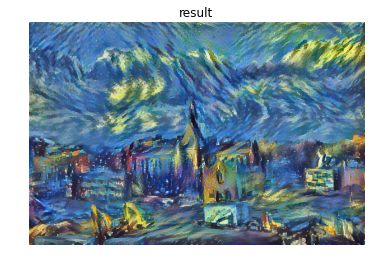

In [5]:
out_img = io.imread("output/out.jpg")
plt.axis('off')
plt.title('result')
plt.imshow(out_img)
plt.show()